<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/cielo/blob/main/revision_bibloografica/c_2_geron/2_edwin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>


## [Video de exposición de la lectura]()

# Informe de revisión bibliográfica 

Páginas 80 a 93 de Géron. 

# Obtener los datos


En entornos típicos, sus datos estarían disponibles en una base de datos relacional (o algún otro almacén de datos común) y distribuidos en múltiples tablas/documentos/archivos.

Para acceder a él, primero deberá obtener sus credenciales y autorizaciones de acceso y familiarizarse con el esquema de datos.

En este proyecto, sin embargo, las cosas son mucho más sencillas: simplemente descargará un único archivo de valores separados por comas (CSV), `vivienda.csv` que tiene todos los datos.

Puede usar su navegador web para descargar el archivo y ejecutar y extraer el archivo CSV, pero es preferible crear una pequeña función para hacerlo.

Tener una función que descargue los datos es útil en particular si los datos cambian regularmente: puede escribir un pequeño script que use la función para obtener los datos más recientes (o puede configurar un trabajo programado para hacerlo automáticamente a intervalos regulares).

Automatizar el proceso de obtención de datos también es útil si necesita instalar el conjunto de datos en varias máquinas.

Aquí está la función `obtener_datos()`: 


In [1]:
from regresion import obtener_datos
vivienda = obtener_datos('https://raw.githubusercontent.com/marco-canas/didactica_ciencia_datos/main/datasets/vivienda/vivienda.csv')
vivienda 

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,proximidad,precio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,84700.0


Ahora, cuando llama a `obtener_datos()`, descarga el archivo `vivienda.csv` del repositorio DIMATHDATA (Didáctica de la ciencia de datos) y los convierte en un DataFrame de Pandas.

This function returns a pandas DataFrame object containing all the data.

# Eche un vistazo rápido a la estructura de datos

Let’s take a look at the top five rows using the DataFrame’s `head()` method (see Figure 2-5).

In [2]:
vivienda.head() 

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,proximidad,precio
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,342200.0


Each row represents one district. There are 10 attributes (you can see the first 6
in the screenshot): longitude, latitude, housing_median_age,
total_rooms, total_bedrooms, population, households, median_income,
median_house_value, and ocean_proximity.
The info() method is useful to get a quick description of the data, in particular
the total number of rows, each attribute’s type, and the number of nonnull
values (see Figure 2-6).


In [3]:
vivienda.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   longitud      20640 non-null  float64
 1   latitud       20640 non-null  float64
 2   antiguedad    20640 non-null  float64
 3   habitaciones  20640 non-null  float64
 4   dormitorios   20433 non-null  float64
 5   población     20640 non-null  float64
 6   hogares       20640 non-null  float64
 7   ingresos      20640 non-null  float64
 8   proximidad    20640 non-null  object 
 9   precio        20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset, which means that it is fairly small by
Machine Learning standards, but it’s perfect to get started. Notice that the
total_bedrooms attribute has only 20,433 nonnull values, meaning that 207
districts are missing this feature. We will need to take care of this later.
All attributes are numerical, except the ocean_proximity field. Its type is
object, so it could hold any kind of Python object. But since you loaded this
data from a CSV file, you know that it must be a text attribute. When you
looked at the top five rows, you probably noticed that the values in the
ocean_proximity column were repetitive, which means that it is probably a
categorical attribute. You can find out what categories exist and how many
districts belong to each category by using the value_counts() method:


In [4]:
vivienda['proximidad'].value_counts() 

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: proximidad, dtype: int64

Let’s look at the other fields. The describe() method shows a summary of the
numerical attributes (Figure 2-7)

In [5]:
vivienda.describe()

,longitud,latitud,antiguedad,habitaciones,dormitorios,población,hogares,ingresos,precio
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (so, for example, the count of total_bedrooms is 20,433, not 20,640). 

The std row shows the standard deviation, which measures how
dispersed the values are. The 25%, 50%, and 75% rows show the
corresponding percentiles: a percentile indicates the value below which a given
percentage of observations in a group of observations fall.

 For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or first quartile), the median, and the 75th percentile (or third quartile).


Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute.

A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). 

You can either plot this one attribute at a time, or you can call the hist() method on the whole dataset (as shown in the following code example), and it will plot a histogram for each numerical attribute:


# Plot a histogram for each numerical attibute 

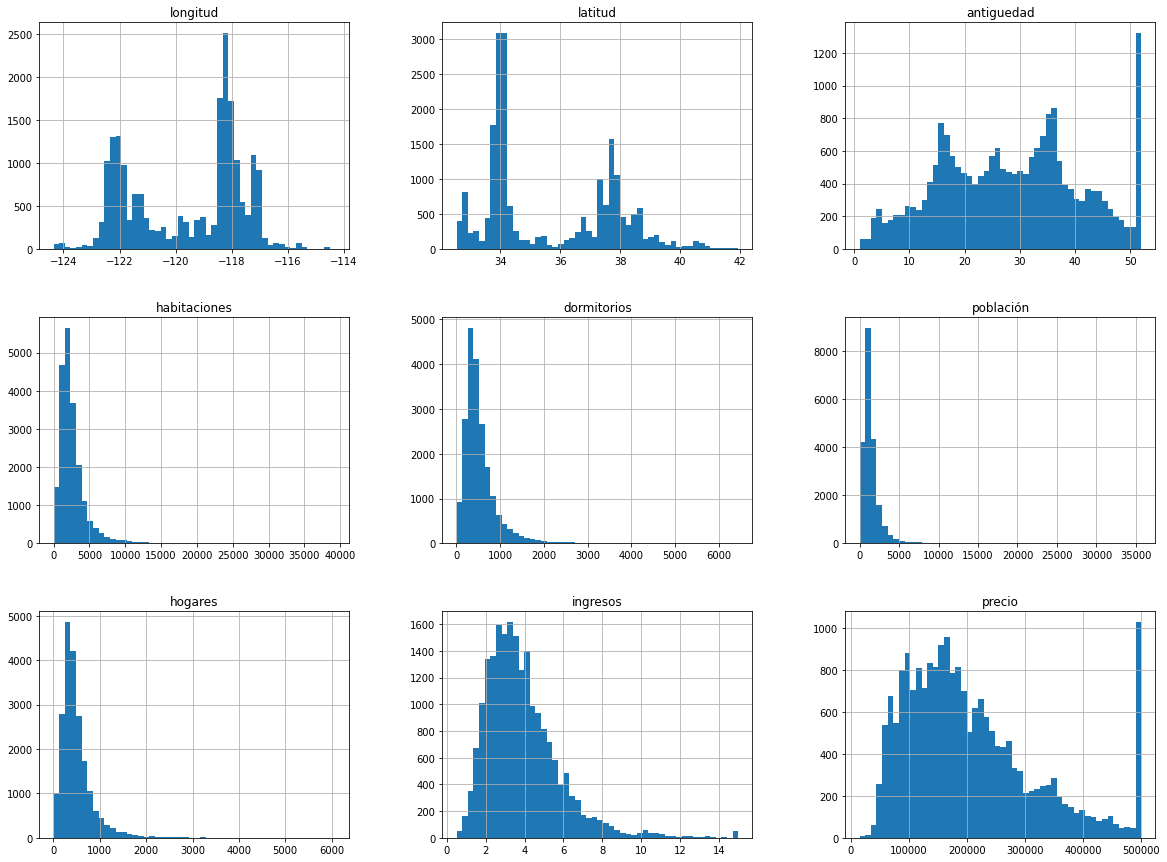

In [4]:
from regresion import  visualizarMatrizHistogramas
visualizarMatrizHistogramas(vivienda) 

## NOTE


The hist() method relies on Matplotlib, which in turn relies on a user-specified graphical
backend to draw on your screen. So before you can plot anything, you need to specify which
backend Matplotlib should use. The simplest option is to use Jupyter’s magic command
%matplotlib inline. This tells Jupyter to set up Matplotlib so it uses Jupyter’s own
backend. Plots are then rendered within the notebook itself. Note that calling show() is
optional in a Jupyter notebook, as Jupyter will automatically display plots when a cell is
executed.

There are a few things you might notice in these histograms:


1. First, the median income attribute does not look like it is expressed in US dollars (USD). After checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000). 

Working
with preprocessed attributes is common in Machine Learning, and it is
not necessarily a problem, but you should try to understand how the
data was computed.


2. The housing median age and the median house value were also capped. The latter may be a serious problem since it is your target attribute
(your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit. You need to check with your client team
(the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond
$500,000, then you have two options:  

  a. Collect proper labels for the districts whose labels were capped.  

  b. Remove those districts from the training set (and also from the test set, since your system should not be evaluated poorly if it predicts values beyond $500,000).


3. These attributes have very different scales. We will discuss this later in
this chapter, when we explore feature scaling.
4. Finally, many histograms are tail-heavy: they extend much farther to
the right of the median than to the left. This may make it a bit harder
for some Machine Learning algorithms to detect patterns. We will try
transforming these attributes later on to have more bell-shaped
distributions.
Hopefully you now have a better understanding of the kind of data you are
dealing with.


## WARNING


Wait! Before you look at the data any further, you need to create a test set, put it aside, and
never look at it.


# Create a Test Set


It may sound strange to voluntarily set aside part of the data at this stage. 

After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use, right? 

This is true, but your brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. 

When you estimate the generalization error using the test set, your estimate will be too optimistic, and you will launch a system that will not perform as well as expected. 

This is
called data snooping bias.


Creating a test set is theoretically simple: pick some instances randomly,
typically 20% of the dataset (or less if your dataset is very large), and set them
aside:

In [3]:
from regresion import dividir_entrenamiento_testeo
X_train, X_test, y_train, y_test = dividir_entrenamiento_testeo(vivienda)  

Hasta ahora hemos considerado solo muestreo puramente aleatorio

This is generally fine if your dataset is large enough (especially relative to the number of attributes), but if it is not, you run the risk of introducing a significant sampling bias. 

When a survey company decides to call 1,000 people to ask them a few questions, they don’t just pick 1,000 people randomly in a phone book. They try to ensure that these 1,000 people are representative of the whole population. 

For
example, the US population is 51.3% females and 48.7% males, so a well conducted survey in the US would try to maintain this ratio in the sample: 513
female and 487 male. 

This is called stratified sampling: the population is
divided into homogeneous subgroups called strata, and the right number of
instances are sampled from each stratum to guarantee that the test set is
representative of the overall population. If the people running the survey used
purely random sampling, there would be about a 12% chance of sampling a
skewed test set that was either less than 49% female or more than 54% female.
Either way, the survey results would be significantly biased.
Suppose you chatted with experts who told you that the median income is a
very important attribute to predict median housing prices. You may want to
ensure that the test set is representative of the various categories of incomes in
the whole dataset. Since the median income is a continuous numerical attribute,
you first need to create an income category attribute. Let’s look at the median
income histogram more closely (back in Figure 2-8): most median income
values are clustered around 1.5 to 6 (i.e., $15,000–$60,000), but some median
incomes go far beyond 6. It is important to have a sufficient number of


# Referentes  

